In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import dirichlet

In [23]:
params = {}
params['alpha'] = 0.2532
params['omega'] = 0.2819
params['tau'] = 0.4649
params['mu'] = 0.2930
params['nu'] = 2.3774
params['r'] = 0.8572

params['gamma'] = 1/params['tau']
params['beta'] = 1

In [24]:
alpha_m, omega_m = np.meshgrid(np.linspace(0,0.5,10), np.linspace(0, 0.5, 10))
params['tau'] = 1 - alpha_m - omega_m
params['delta'] = params['mu'] + params['gamma']*params['tau'] + params['nu']*omega_m

In [25]:
r_crit_frac = np.exp(params['mu']) / (np.exp(params['delta']) - 1)
r_crit_term1 = np.exp(params['gamma']*params['tau'])
r_crit_term2 = np.exp(alpha_m*params['beta'] + params['gamma']*params['tau'])
r_crit_term3 = np.exp(alpha_m*params['beta'] + params['delta'])

r_crit = r_crit_frac*(r_crit_term1 + r_crit_term2 + r_crit_term3 - 1) - 1

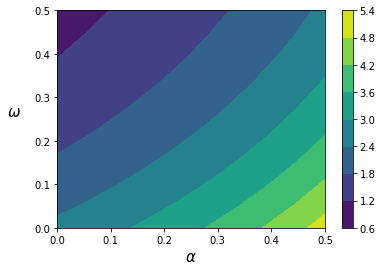

In [26]:
fig, ax = plt.subplots()

cf = ax.contourf(alpha_m, omega_m, r_crit)
ax.set_xlabel(r'$\alpha$',fontsize=15); ax.set_ylabel(r'$\omega$', rotation=0, labelpad=20,fontsize=15)
fig.colorbar(cf, ax = ax)
plt.show()

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff

In [77]:
params = {}
params['r'] = 0.4
params['mu'] = 0.2930
params['gamma'] = 1
params['nu'] = 0.1
params['beta'] = 0.1

In [78]:
combos = dirichlet.rvs([0.1,0.1,0.1], size=2000).T
alpha_m = combos[0,:]
omega_m = combos[1,:]
tau_m = combos[2,:]

params['delta'] = params['mu'] + params['gamma']*tau_m + params['nu']*omega_m

In [79]:
r_crit_frac = np.exp(params['mu']) / (np.exp(params['delta']) - 1)
r_crit_term1 = np.exp(params['gamma']*tau_m)
r_crit_term2 = np.exp(alpha_m*params['beta'] + params['gamma']*tau_m)
r_crit_term3 = np.exp(alpha_m*params['beta'] + params['delta'])

r_crit = r_crit_frac*(r_crit_term1 - r_crit_term2 + r_crit_term3 - 1) - 1

In [89]:
fig = ff.create_ternary_contour(np.array([alpha_m, omega_m, tau_m]), r_crit,
                                pole_labels=[r'$\alpha$', r'$\omega$', r'$\tau$'],
                                interp_mode='cartesian',
                                ncontours=50,
                                colorscale='Viridis',
                                showscale=True,
                                title='Reproduction Threshold')
fig.show()